In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.isnull().sum()
df.duplicated().sum()

df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)

df['v2'] = df['v2'].apply(preprocess_text)

In [ ]:
df['text_length'] = df['v2'].apply(len)
df['num_punctuations'] = df['v2'].apply(lambda x: len([char for char in x if char in string.punctuation]))

df.head()

,v1,v2,text_length,num_punctuations
0,0,go jurong point crazi avail bugi n great world...,76,0
1,0,ok lar joke wif u oni,21,0
2,1,free entri 2 wkli comp win fa cup final tkt 21...,132,0
3,0,u dun say earli hor u c alreadi say,35,0
4,0,nah think goe usf live around though,36,0


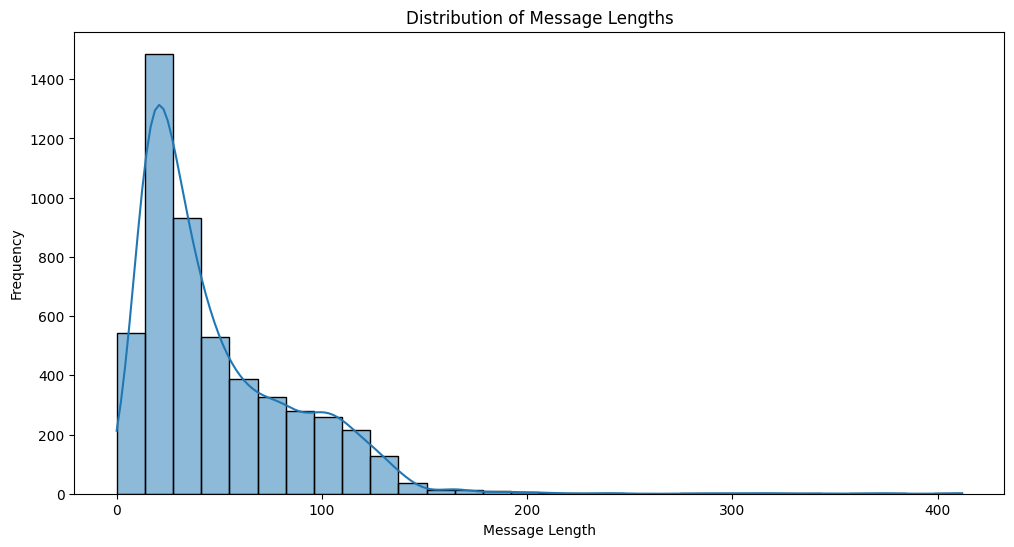

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
X = df[['v2', 'text_length', 'num_punctuations']]
y = df['v1']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_text = vectorizer.fit_transform(X_train1['v2'])
X_test_text = vectorizer.transform(X_test1['v2'])

# Combine text features with additional features
X_train = np.hstack((X_train_text.toarray(), X_train1[['text_length', 'num_punctuations']].values))
X_test = np.hstack((X_test_text.toarray(), X_test1[['text_length', 'num_punctuations']].values))

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9939540507859734
Training Precision: 0.99392933267975
Training Recall: 0.9939540507859734
Training F1 Score: 0.9939307790793185
Training Confusion Matrix:
[[3619    8]
 [  17  491]]

Testing Accuracy: 0.9816247582205029
Testing Precision: 0.9814404540145725
Testing Recall: 0.9816247582205029
Testing F1 Score: 0.9813767650759861
Testing Confusion Matrix:
[[884   5]
 [ 14 131]]


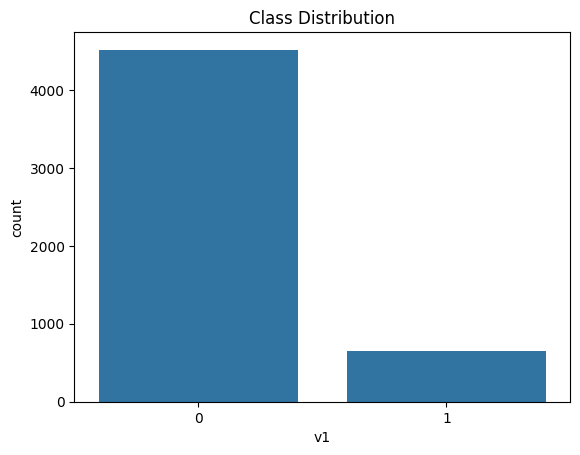

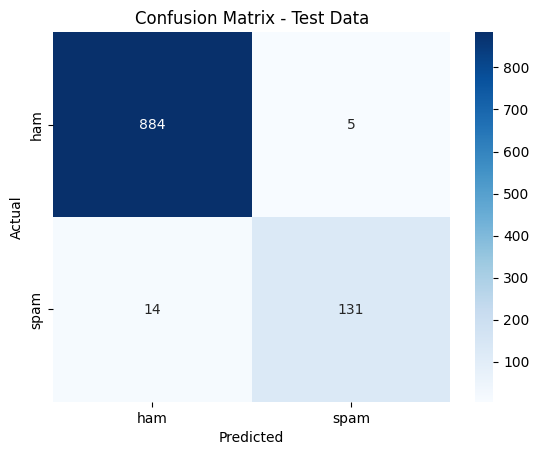

In [ ]:
# Class distribution
sns.countplot(x='v1', data=df)
plt.title('Class Distribution')
plt.show()

# Confusion matrix visualization
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()